In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load and preprocess the dataset (update with your path if needed)
file_path = '/content/loan_prediction.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

In [3]:
# Data preprocessing
df['Dependents'] = df['Dependents'].replace({'3+': 3})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Semiurban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


In [4]:
# Fill missing numeric values with median
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

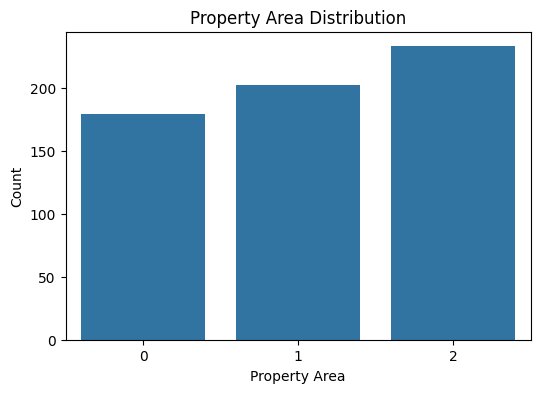

In [5]:
# Property Area distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Property_Area')
plt.title('Property Area Distribution')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

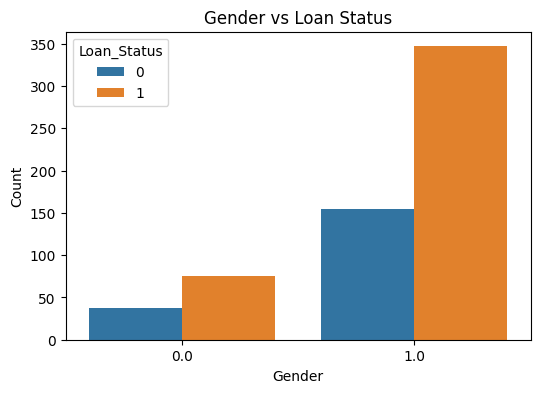

In [6]:
# Gender vs Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title('Gender vs Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

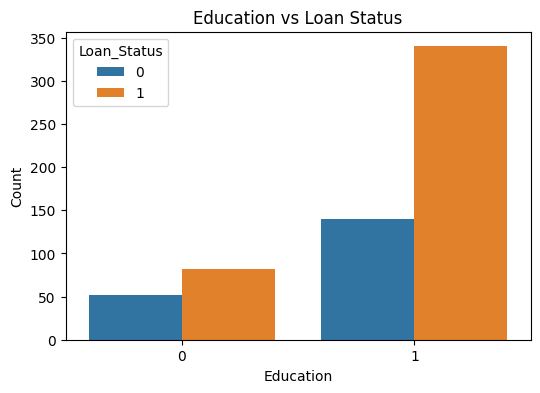

In [7]:
# Education vs Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

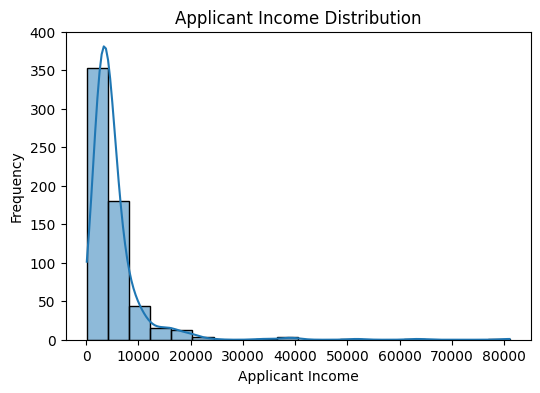

In [8]:
# Applicant Income distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['ApplicantIncome'], kde=True, bins=20)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Features and target variable
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
        'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Model Evaluation
y_pred = rf.predict(X_test)


In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.76


In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[18 25]
 [ 4 76]]


In [15]:
# Classification report
class_report = classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"])
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

Not Approved       0.82      0.42      0.55        43
    Approved       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



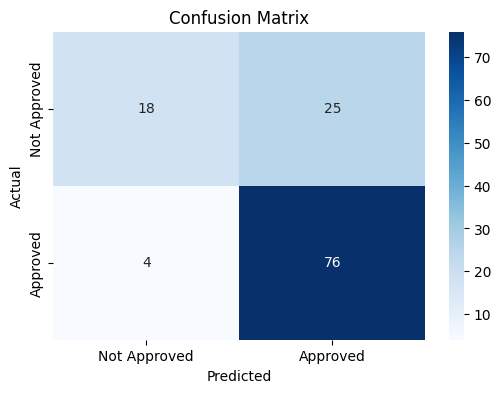

In [16]:

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Approved", "Approved"],
            yticklabels=["Not Approved", "Approved"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:

# Input collection using basic Python input()
def get_input():
    print("Enter the details to predict loan approval:")

    gender = input("Gender (Male/Female): ").strip()
    gender = 1 if gender.lower() == "male" else 0

    married = input("Married (Yes/No): ").strip()
    married = 1 if married.lower() == "yes" else 0

    dependents = input("Dependents (0/1/2/3+): ").strip()
    if dependents == "3+":
        dependents = 3
    else:
        dependents = int(dependents)

    education = input("Education (Graduate/Not Graduate): ").strip()
    education = 1 if education.lower() == "graduate" else 0

    self_employed = input("Self Employed (Yes/No): ").strip()
    self_employed = 1 if self_employed.lower() == "yes" else 0

    applicant_income = float(input("Applicant Income: "))
    coapplicant_income = float(input("Coapplicant Income: "))
    loan_amount = float(input("Loan Amount: "))
    loan_term = float(input("Loan Amount Term (in months): "))
    credit_history = input("Credit History (Good/Bad): ").strip()
    credit_history = 1 if credit_history.lower() == "good" else 0

    property_area = input("Property Area (Urban/Semiurban/Rural): ").strip()
    if property_area.lower() == "urban":
        property_area = 1
    elif property_area.lower() == "rural":
        property_area = 0
    else:
        property_area = 2

    return [
        gender, married, dependents, education, self_employed,
        applicant_income, coapplicant_income, loan_amount,
        loan_term, credit_history, property_area
    ]

# Predict loan approval
def predict_loan():
    data = get_input()
    prediction = rf.predict([data])[0]
    result = "Yes" if prediction == 1 else "No"
    print(f"Loan Approval: {result}")

# Call the function to predict loan approval
predict_loan()

Enter the details to predict loan approval:
Gender (Male/Female): Male
Married (Yes/No): Yes
Dependents (0/1/2/3+): 0
Education (Graduate/Not Graduate): Graduate
Self Employed (Yes/No): yes
Applicant Income: 80000
Coapplicant Income: 1000
Loan Amount: 1000
Loan Amount Term (in months): 12
Credit History (Good/Bad): Good
Property Area (Urban/Semiurban/Rural): Urban
Loan Approval: Yes


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
